In [116]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

from random import sample
from subprocess import check_output

In [117]:
infileAveWageDept = 'City_of_Seattle_Wages__Comparison_by_Gender_-_Average_Hourly_Wage_by_Department-1.csv'
infileWageJobTitles = 'City_of_Seattle_Wages___Comparison_by_Gender__Wage_Progression_Job_Titles-1.csv'

In [118]:
dfAveWageDept = pd.read_csv(infileAveWageDept)
dfAveWageDept.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [119]:
departmentDF = dfAveWageDept.groupby(
   ['Department']
    ).agg(
        {
             'Total No. Empl':sum,    # Sum duration per group
             'No. Male Empl': "count",  # get the count of females
             'No. Female Empl': "count",  # get the count of males

        }
    )
dfAveWageDept

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.00,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.00,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.00,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.00,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,NaN,NaN,34.45,1.0,34.45,1,73.00,NaN,No women in title
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",NaN,NaN,29.99,2.0,29.99,2,43.00,NaN,No women in title
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,NaN,NaN,27.65,3.0,27.65,3,47.00,NaN,No women in title
1645,Seattle Public Utilities,Wtrworks Maint Supv,NaN,NaN,35.57,1.0,35.57,1,14.00,NaN,No women in title


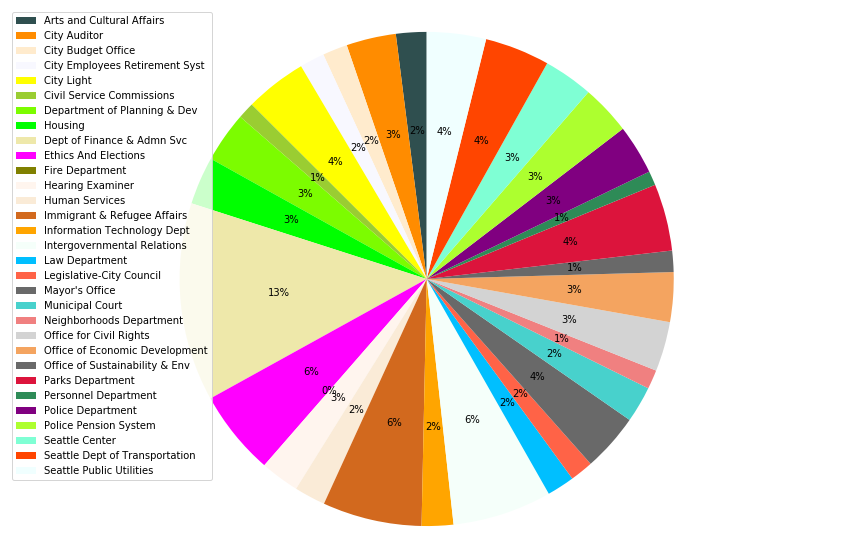

In [141]:
#What is the male to female ratio of each deptartment? - pie charts
#create list of colors
colors = []
#Get Unique Departments
labels = dfAveWageDept["Department"].unique()
#remove last entry from Labels "Nan"
labels = np.delete(labels, len(labels) - 1)

#get random colors
all_colors = [k for k,v in matplotlib.colors.cnames.items()]
colors = sample(all_colors, len(labels))


fig = plt.figure(figsize=(15,10))
# plot pie chart
patches,text, autoTexts = plt.pie(
    # dividing dfs to get ratio by sex
    departmentDF['No. Male Empl'] / departmentDF['No. Female Empl'],
    autopct='%1.f%%', 
    startangle=90,
    colors=colors
    )

plt.legend(patches, labels, loc="best")
# View the plot drop above
plt.axis('equal')

#plt.tight_layout()
plt.show()

In [122]:
#What is the female to male % average hourly rate by department? (variance in wage) - scatterplot